In [230]:
# preprocessing
from sklearn import preprocessing

# iteration operations
import itertools

# nlp
import langdetect

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# word cloud
from wordcloud import WordCloud
# visualization
import matplotlib.pyplot as plt

# algebra
import numpy as np

# dataframing
import pandas as pd

In [231]:
data = pd.read_csv("./data/youtube_dataset.csv")

## 0. About data

 - Data is about **YouTube comments**. It includes video that the comment was posted on, channel of the video, date, amount of likes the video received, etc.
 - In total, there is 7 features and 19300 instances.
 - Dataset was found and downloaded from https://www.kaggle.com/nipunarora8/most-liked-comments-on-youtube


## 1. Examine data

In [232]:
data.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122


In [233]:
data.sample(frac = 1)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
688,Maroon 5 - Sugar (Official Music Video),Maroon5VEVO,UgyMlZaZk7iCx8fw2V94AaABAg,RubEnKabrall,LAS REACCIONES DE TODOS SON TAN FALSAS!,2020-09-08T03:08:14Z,1
9476,Guns N&#39; Roses - November Rain,GunsNRosesVEVO,UgwNf3AZJ1rWx7SAy0t4AaABAg,Smelly Fart,I think this song is on the top with Bohemian ...,2020-08-23T11:48:57Z,148
18328,Daddy Yankee - Limbo (Video Oficial),DaddyYankeeVEVO,Ugw6YCm01-iy9wmzH-14AaABAg,Sandro Tolentino espinoza,Cuando escuchábamos esta canción estábamos en ...,2020-09-03T19:51:26Z,35
899,Ed Sheeran - Thinking Out Loud [Official Video],Ed Sheeran,UgyEqjTTVM12HkMjNAN4AaABAg,Tiago Lucas,Unpopular opinion: quarantine makes old songs ...,2020-05-18T22:22:35Z,2892
8367,Chino y Nacho - Andas En Mi Cabeza ft. Daddy Y...,ChinoNachoVEVO,UgzzPUl9OFGE30DdZcN4AaABAg,DAVID,Yo escuchando esta canción hermosa en cuarente...,2020-09-07T16:43:10Z,0
...,...,...,...,...,...,...,...
8989,22. Hasta el Amanecer - Nicky Jam | Video Oficial,NickyJamTV,UgyMRRiTYBMkQynPvF94AaABAg,Maria Cristina Martinez Perez,Esta canción me hace llorar es da heavy,2020-07-05T22:58:22Z,1
16496,Pharrell Williams - Happy (Official Music Video),iamOTHER,UgxeyZ0bNmcr4t9Z-aJ4AaABAg,cotdamn_jamal cotdamn,"Pharrell is like 40 somethin years old, yet he...",2020-07-09T23:12:05Z,1
7964,twenty one pilots: Heathens (from Suicide Squa...,Fueled By Ramen,UgzhTheIIYnOjTuUpex4AaABAg,JoshCarter,*This video makes Suicide Squad look like a go...,2020-02-02T19:47:10Z,24093
16764,Lil Pump - &quot;Gucci Gang&quot; (Official Mu...,Lil pump,Ugyb4BjxN-Yd9NdL0rp4AaABAg,G0DL,Who else just randomly remembered this song?,2020-09-05T17:41:27Z,7


In [234]:
# most liked comments
data.sort_values("Likes",ascending=False)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
5201,Marshmello - Alone (Official Music Video),Marshmello,UgypW6-bk7J6JZJF1954AaABAg,Marshmello,"1,000,000,000 ✅",2018-10-15T19:33:03Z,540334
15805,Eminem - Rap God (Explicit) [Official Video],EminemVEVO,UgjtQw8E3CESxngCoAEC,Goldenightime,Eminem raps faster than my internet connection,2016-08-13T02:15:49Z,438973
5,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzryH8U6Dz_yBmIgEZ4AaABAg,LR ICED WOLF,3.2 Million comments if you find mine your a l...,2020-03-15T21:11:08Z,370547
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3120,Justin Bieber - Baby (Official Music Video) ft...,JustinBieberVEVO,Ugzv_LcinEv-IMMQZZN4AaABAg,Siddhant Dubey,There's 4.6M comments if you find mine then y...,2019-07-20T06:46:38Z,350917
...,...,...,...,...,...,...,...
11089,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,Ugyndg3MQJbNCdEGZHF4AaABAg,Josthin Cobeña,ME RIO DEL MIEDO,2020-06-28T18:34:13Z,0
11090,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,Ugz3Wy-qB08sAmy3zqV4AaABAg,Yisela Chaves,this song is beautiful,2020-06-23T22:36:37Z,0
4393,Shawn Mendes - Treat You Better,ShawnMendesVEVO,UgzScCcK6uBP92JF6yl4AaABAg,UwU,I make vid using this song and send this to my...,2020-09-08T12:21:43Z,0
11091,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,UgzZnAQdvpSS7knETiR4AaABAg,Hades Uwu,2017 el mejor año por ahora 🔥,2020-08-18T19:26:01Z,0


## 2. Preprocessing

### 1. Duplicates

In [235]:
# check for duplicates
data['Comment Id'].value_counts()[:10]

UgxB4aiyqdL0DaQA1dV4AaABAg    2
UgwLYnOGrX_lT9b2CL94AaABAg    2
Ugz2b7D-9NC5fqnrF1J4AaABAg    2
UgyFh4aSvTUDzF_9Fad4AaABAg    2
UgwgcGaS0yHi-EuKLJV4AaABAg    2
UgzkcLZyGvv5YKYo38Z4AaABAg    2
UgzGgGxRglv095nSkih4AaABAg    2
UgxNfyU4jGsUFXTD6-x4AaABAg    2
UgyRmP762EWyoMGCF2V4AaABAg    2
UgxYP_7t29MmzuqEPV94AaABAg    2
Name: Comment Id, dtype: int64

In [236]:
# remove duplicates
data.drop_duplicates(['Comment Id'], keep='first', inplace=True)

In [237]:
# check result
data['Comment Id'].value_counts()[:10]

Ugy2wcFlBirQZ7Ecetl4AaABAg    1
Ugyrgg-SqqYq1B6Grex4AaABAg    1
UgzicuHEswYjnqxw9GB4AaABAg    1
UgwRNmvlE4EZ9jVCZ3x4AaABAg    1
UgwFKjw37pHVl7I6W-t4AaABAg    1
Ugyh7mIgzvFILDM7M4d4AaABAg    1
UgxTmQT2HOazXdbsNbh4AaABAg    1
UgxNsUAZ7yL80BNxatp4AaABAg    1
UgyLdnFb4Q72jqiT7dV4AaABAg    1
UgysI_xOersdwhCHb-Z4AaABAg    1
Name: Comment Id, dtype: int64

### 2. Language detection

A problem: The comments are written in multiple different languages. Later, when extracting patterns from comments, multiple languages might bring problems. For example Japanese and Korean languages don't write spaces. Detecting words is hence challenging with the same logic than with for example English. 

So, let's try to detect the language of the comments with tools available, and examine the results.

Let's try library called **langdetect**, which has a support for 55 languages. It is not perfect, and especially short/single word sentences causes trouble for it. We don't have ground truths for languages, but let's take a random sample of 100 and examine manually how the library succeeds.

In [238]:
comments = data.sample(n=100, random_state=1)['Comment'].values
for c in comments:
    print(c)
    try:
        print(langdetect.detect(c))
    except:
        pass

Mi novia me dejo por que decía que me gusta mucho el reggaetón 
Pero volverá, para seducirme otra vez, besarme otra vez volverme a poner el mundo al revés. 🤷🏿‍♂️
Yes Mari and Keone!!!!!!!!!
jajaja ches mancos yo desde chiquita yo sabía que la morena era la Taylor
I've counted too many stars, now I'm an astronomer.
Found out I’m twice this guy’s age but I still can’t help but wanna play it
WALKERS TOGETHER AND FOREVER 😎😎😎TAKE ME THROUGH THE NIGHT FALL INTO THE DARKSIDE WE DON'T NEED THE LIGHT WERE LIVE ON THE DARK SIDE
Do you recall, not long ago
We would walk on the sidewalk
Innocent, remember?
All we did was care for each other

But the night was warm
We were bold and young
All around the wind blows
We would only hold on to let go

Blow a kiss, fire a gun
We need someone to lean on
Blow a kiss, fire a gun
All we need is somebody to lean on

Blow a kiss, fire a gun
We need someone to lean on
Blow a kiss, fire a gun
All we need is somebody to lean on

What will we do when we get old?
Wi

We can see that from this sample that
1. Most of the comments are in English.
2. Further, most of the languages are correctly detected (I spotted three mistakes).

Dominance of English in this sample means that we cannot examine well enough how does the detection work for other languages (except maybe Spanish and Portugease). To play it safer, let's use only the comments which are detected as English.

In [239]:
def detect_lang(comment: str):
    """
    Embed try / except syntax for detecting languages.
    """
    
    try:
        return langdetect.detect(comment)
    except:
        return comment

# apply detection for each comment
lang = data['Comment'].apply(detect_lang)
data['Language'] = lang

In [240]:
print(lang)
print("Number of English comments:", len(lang[lang=='en']))
print("% of total number of comments: ", (len(lang[lang=='en']) / len(data)) * 100)

0        en
1        en
2        en
3        en
4        en
         ..
19295    en
19296    en
19297    en
19298    en
19299    es
Name: Comment, Length: 19121, dtype: object
Number of English comments: 13201
% of total number of comments:  69.03927618848387


Let's extract the English comments.

In [241]:
data_en = data[data['Language'] == 'en'].copy()
data_en.head(20)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,Language
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,en
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773,en
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081,en
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,en
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122,en
6,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzPg7VsuRTwJf77jch4AaABAg,lucas tehe12,claim your “here before 7 billion” tickets her...,2020-09-08T06:01:36Z,763,en
7,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugw61yKNdyVJ5T4R_sN4AaABAg,MemeDille,The ones who are NOT from Tik-Tok can like thi...,2020-09-08T08:44:47Z,94,en
8,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzhueoG3QOV4AbAYAt4AaABAg,Guty Castro soda,Song: spanish\nComments: English\nHotel: trivago,2020-09-09T01:17:50Z,150,en
10,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxcqxyEw2jU7KvhofV4AaABAg,cruisendude,The first viewer must feel like the king of th...,2020-08-21T23:15:01Z,36446,en
11,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugy-CwNxTeLKUuYOXdF4AaABAg,Pls HeLP Me reach 100 SUBscribers,Just imagine how many people's come here every...,2020-09-09T05:43:47Z,142,en


## 3. Natural Language Processing

Let's test NLP methods on the data.

In [242]:
comments = data_en['Comment']

In [243]:
# cut comments into sentences
sentences = [sent_tokenize(c) for c in comments]

In [244]:
words = [word_tokenize(c) for c in comments]  # cut comments into words
words[0:3]

[['The',
  'people',
  'who',
  'liked',
  'this',
  'comment',
  'is',
  'officially',
  'before',
  '7B',
  'views'],
 ['-', 'Wait', ',', 'it', "'s", '7B', 'views', '-', 'Always', 'has', 'been'],
 ['*',
  'Teacher',
  ':',
  'What',
  'is',
  'the',
  'population',
  'of',
  'the',
  'Earth',
  '?',
  '*',
  '*',
  'Me',
  ':',
  'Around',
  'one',
  'Despacito',
  '*']]

### 1. Frequent words

In [245]:
words_all = [w.lower() for w in list(itertools.chain.from_iterable(words)) ] # set words to lowercase and combine all words together into one list.
fdist = FreqDist(words_all)  # count frequencies
fdist.most_common(10)  # list 10 most common words and counts

[(',', 13223),
 ('i', 12299),
 ('the', 9948),
 ('you', 9083),
 ('this', 8000),
 ('.', 7360),
 (':', 7331),
 ('to', 6638),
 ('and', 5622),
 ('a', 5143)]

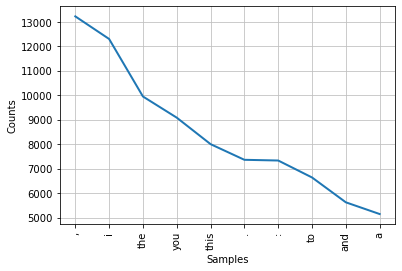

In [246]:
fdist.plot(10)

**Remove punctuation marks**

For knowledge discovery, punctuation marks are not very useful. Let's remove them from data.

In [247]:
words_no_punc = [w for w in words_all if w.isalpha()]

In [248]:
print(len(words_all), len(words_no_punc))

394850 319057


Punctuation marks removed.

In [249]:
fdist = FreqDist(words_no_punc)
fdist.most_common(10)

[('i', 12299),
 ('the', 9948),
 ('you', 9083),
 ('this', 8000),
 ('to', 6638),
 ('and', 5622),
 ('a', 5143),
 ('is', 4313),
 ('in', 4293),
 ('it', 4201)]

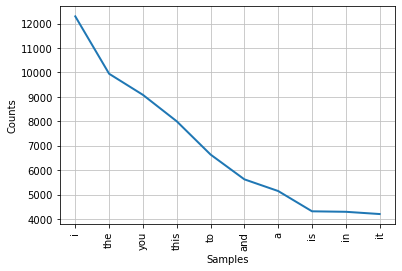

In [250]:
fdist.plot(10)

**Remove stopwords**

Words such as 'and', 'but' and 'so' are also not very informative in relation to the content of the comments. Hence, let's remove them as well.

In [251]:
sw = stopwords.words("english")  # english language stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [252]:
words_no_stopwords = [w for w in words_no_punc if w not in sw]  # exlude stopwords
print(len(words_no_punc), len(words_no_stopwords))

319057 164359


**Final frequency distribution**

In [253]:
fdist = FreqDist(words_no_stopwords)
fdist.most_common(10)

[('song', 3754),
 ('like', 2521),
 ('love', 1714),
 ('people', 1629),
 ('know', 1567),
 ('oh', 1561),
 ('years', 1407),
 ('rip', 1317),
 ('one', 1280),
 ('still', 1100)]

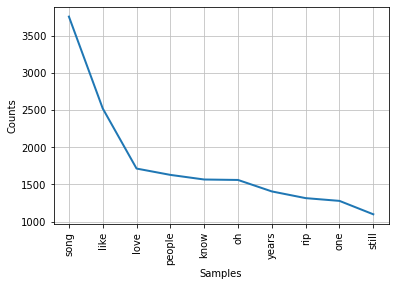

In [254]:
fdist.plot(10)

**WordCloud**

Let's generate a WordCloud to visualize the frequent words.

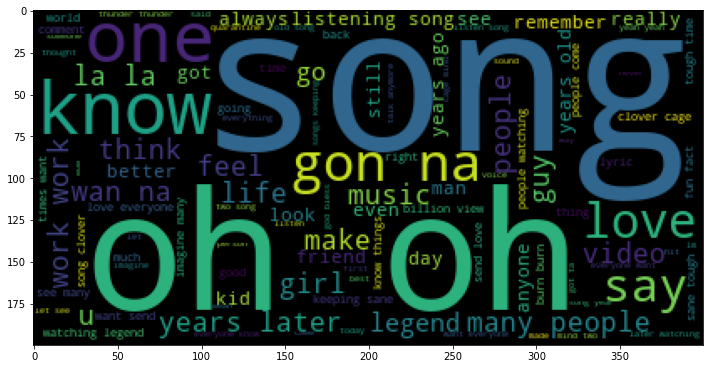

In [255]:
wc = WordCloud().generate(" ".join(words_no_stopwords))
plt.figure(figsize = (12, 12))
plt.imshow(wc)

## 2. Bag of Words

Let's turn our data of comments into a matrix of word counts. In the end, we have a matrix where on 0-axis there is the comments, and on 1-axis the words.

This process is called the Bag of Words representation. 

Let's use **CountVectorizer** to convert the comments into a matrix of token (word) counts.

In [256]:
# specify data and target
X = data_en['Comment']
y = data_en['Likes']
print(X.shape)
print(y.shape)

(13201,)
(13201,)


In [257]:
# split X and y into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9900,)
(3301,)
(9900,)
(3301,)


In [279]:
# import and create an instance of CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = CountVectorizer()

In [280]:
# learn the "vocabulary" of the train data
vectorizer.fit(X_train)

TfidfVectorizer()

In [281]:
# words that the vectorizer has "learned" from the comments
feature_names = vectorizer.get_feature_names()

**Note: How does this differ from tokenizing to words, that we did earlier?**

 - Everything is lowercase
 - Words less than two letters have not been included (notice there is no 'a')
 - Punctuation has been removed
 - There are no duplicates

In [284]:
# transform data into a document-term matrix (aka comment-word matrix)
X_train_dtm = vectorizer.transform(X_train)

# convert the matrix into a dataframe
pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names())

,00,000,001,00s,01,016,02,020s,03,04,...,주무세요,한국인,ｐｅｒｆｅｃｔ,𝑑𝑖𝑒𝑠,𝓝𝓸𝓼𝓽𝓪𝓵𝓰𝓲𝓪,𝗙𝗔𝗡,𝗹𝗲𝗴𝗲𝗻𝗱,𝗿𝗲,𝘆𝗼𝘂,𝚂ᴜʙ𝚂
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
# using the fitted vocabulary, transform testing data into document-term matrix
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<3301x10704 sparse matrix of type '<class 'numpy.int64'>'
	with 53530 stored elements in Compressed Sparse Row format>

## 3. Regression

Let's define a Decison Tree Regressor- and Random Forest Regressor- models and fit them to our data.

In [263]:
# import and create an instance of DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dtr_model = DecisionTreeRegressor(random_state=1)
rfr_model = RandomForestRegressor(random_state=1)

models = {"Decision Tree Regressor": dtr_model,
          "Random Forest Regressor": rfr_model,
         }

In [264]:
# fit the models to data
dtr_model.fit(X_train_dtm, y_train)
# rfr_model.fit(X_train_dtm, y_train.ravel())  # does not fit

DecisionTreeRegressor(random_state=1)

In [265]:
# predict likes based on comment
predicted_likes = dtr_model.predict(X_test_dtm)

Let's check how did we do by calculating mean absolute error between our **predicted likes** and **actual** likes for the test data.

In [266]:
# import and calculcate mean absolute error between predicted and actual likes
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, predicted_likes))
print(y_test.describe()) # statistics

3996.200128118889
count      3301.000000
mean       2461.148743
std       10221.211101
min           0.000000
25%           2.000000
50%          29.000000
75%         400.000000
max      246556.000000
Name: Likes, dtype: float64


In [267]:
df = pd.DataFrame({'Target':y_test, 'Predicted Values':predicted_likes.reshape(-1)})
df

,Target,Predicted Values
17709,50,51.000
7812,426,34.000
10558,83,0.000
14954,0,21361.000
12400,1085,4.000
...,...,...
16013,75,224.800
2948,3,157.000
5585,646,1152.000
7748,1097,21629.000


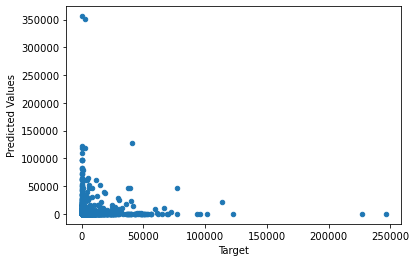

In [268]:
df.reset_index(inplace=True)
df.plot(kind='scatter',x='Target',y='Predicted Values')
plt.show()

Now, we see that our mean absolute error for predictions is around 4000 likes. However, this does not actually tell much about how good our predictions are, since there is a lot of variance in the data. As we notice from the statistics, the like values vary on the interval [0, 438973]. 

Since the interval of likes is long, let's try applying standardization to the values.

## 4. Standardization

Let's create a new feature that shows the like count as **like score**. The scale in likes is quite large. 

Let's try different standardization methods:

In [269]:
# 1. Z-score standardization: x - µ / sigma
y = data_en[['Likes']]
like_score_z_score = preprocessing.StandardScaler().fit_transform(y)

In [270]:
# Examine results
print(like_score_z_score)
print(max(like_score_z_score), min(like_score_z_score))

[[ 7.94646094]
 [-0.14012718]
 [29.32677729]
 ...
 [-0.20373711]
 [-0.20382004]
 [-0.20390298]]
[36.20129362] [-0.20423471]


In [271]:
# 2. Logarithmic standardization, apply logarithm for every value.
y_not_zero = data_en['Likes'].apply(lambda x: x + 1e-10)  # so that x > 0 for all x.

In [272]:
like_score_log = np.log(y_not_zero)

In [273]:
print(like_score_log)
print(max(like_score_log), min(like_score_log))

0        1.149558e+01
1        6.650279e+00
2        1.278291e+01
3        2.564949e+00
4        4.804021e+00
             ...     
19294    1.000000e-10
19295    8.534444e+00
19296    1.791759e+00
19297    1.609438e+00
19298    1.386294e+00
Name: Likes, Length: 13201, dtype: float64
12.99219318674904 -23.025850929940457


In [274]:
# 3. Min-max-scaling, scales values between 0 and 1.
like_score_minmax = preprocessing.MinMaxScaler().fit_transform(y)

In [275]:
print(like_score_minmax)
print(max(like_score_minmax), min(like_score_minmax))

[[2.23886207e-01]
 [1.76092835e-03]
 [8.11168341e-01]
 ...
 [1.36682666e-05]
 [1.13902222e-05]
 [9.11217774e-06]]
[1.] [0.]


Let's fit the DecisionTreeRegressor-model again, but using three different standardized targets.

In [276]:
targets = {"Z-score": like_score_z_score,
           "Logarithm": like_score_log, 
           "Min-Max": like_score_minmax,
          }
print(y_test.shape)

(3301,)


In [277]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    """
    Fits the Decision Tree Regressor-model to data with different leaf-node amounts. 
    Predicts then the like-counts for test data and calculates mean absolute errors.
    """
    
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    mae = mean_absolute_error(test_y, predictions)
    return predictions, mae

Z-score
Max leaf nodes: 5  		 Mean Absolute Error: 0.3249415334295159
        Target  Predicted
0    -0.200088   -0.00932
1    -0.168905   -0.00932
2    -0.197351   -0.00932
3    -0.204235   -0.00932
4    -0.114252   -0.00932
...        ...        ...
3296 -0.198015   -0.00932
3297 -0.203986   -0.00932
3298 -0.150660   -0.00932
3299 -0.113257   -0.00932
3300 -0.203903   -0.00932

[3301 rows x 2 columns]


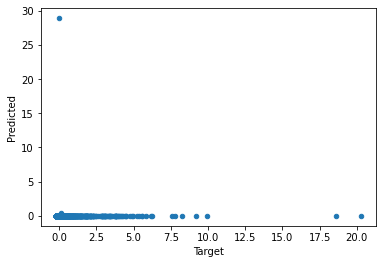

Z-score
Max leaf nodes: 50  		 Mean Absolute Error: 0.3318733827589554
        Target  Predicted
0    -0.200088  -0.046018
1    -0.168905  -0.046018
2    -0.197351  -0.046018
3    -0.204235  -0.046018
4    -0.114252  -0.046018
...        ...        ...
3296 -0.198015  -0.046018
3297 -0.203986  -0.046018
3298 -0.150660  -0.046018
3299 -0.113257  -0.046018
3300 -0.203903  -0.046018

[3301 rows x 2 columns]


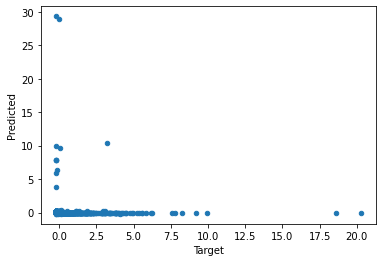

Z-score
Max leaf nodes: 500  		 Mean Absolute Error: 0.3308016483201655
        Target  Predicted
0    -0.200088  -0.133109
1    -0.168905  -0.133109
2    -0.197351  -0.133109
3    -0.204235   1.567306
4    -0.114252  -0.133109
...        ...        ...
3296 -0.198015  -0.133109
3297 -0.203986  -0.133109
3298 -0.150660  -0.133109
3299 -0.113257   1.899703
3300 -0.203903  -0.133109

[3301 rows x 2 columns]


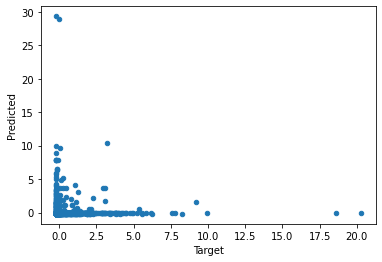

Z-score
Max leaf nodes: 5000  		 Mean Absolute Error: 0.3268270971498415
        Target  Predicted
0    -0.200088  -0.204048
1    -0.168905  -0.201714
2    -0.197351  -0.203972
3    -0.204235   1.567306
4    -0.114252  -0.204041
...        ...        ...
3296 -0.198015  -0.185591
3297 -0.203986  -0.191214
3298 -0.150660   0.008241
3299 -0.113257   1.589532
3300 -0.203903  -0.202358

[3301 rows x 2 columns]


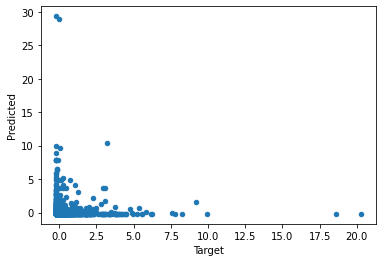

Z-score
Max leaf nodes: None  		 Mean Absolute Error: 0.34138464267063956
        Target  Predicted
0    -0.200088  -0.204235
1    -0.168905  -0.201415
2    -0.197351  -0.204235
3    -0.204235   1.567306
4    -0.114252  -0.203903
...        ...        ...
3296 -0.198015  -0.185591
3297 -0.203986  -0.191214
3298 -0.150660  -0.053586
3299 -0.113257   1.589532
3300 -0.203903  -0.202358

[3301 rows x 2 columns]


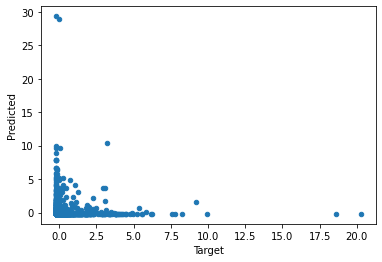

Logarithm
Max leaf nodes: 5  		 Mean Absolute Error: 4.919722679235063
          Target  Predicted
17709   3.912023        NaN
7812    6.054439        NaN
10558   4.418841        NaN
14954 -23.025851        NaN
12400   6.989335        NaN
...          ...        ...
16013   4.317488        NaN
2948    1.098612   1.456239
5585    6.470800        NaN
7748    7.000334        NaN
4324    1.386294        NaN

[3301 rows x 2 columns]


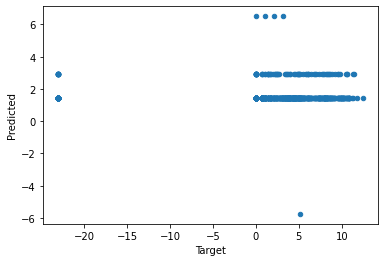

Logarithm
Max leaf nodes: 50  		 Mean Absolute Error: 5.048970648909929
          Target  Predicted
17709   3.912023        NaN
7812    6.054439        NaN
10558   4.418841        NaN
14954 -23.025851        NaN
12400   6.989335        NaN
...          ...        ...
16013   4.317488        NaN
2948    1.098612   1.106577
5585    6.470800        NaN
7748    7.000334        NaN
4324    1.386294        NaN

[3301 rows x 2 columns]


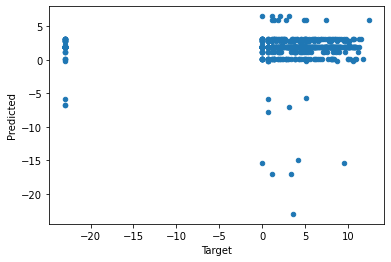

Logarithm
Max leaf nodes: 500  		 Mean Absolute Error: 5.335212811317792
          Target  Predicted
17709   3.912023        NaN
7812    6.054439        NaN
10558   4.418841        NaN
14954 -23.025851        NaN
12400   6.989335        NaN
...          ...        ...
16013   4.317488        NaN
2948    1.098612    2.83065
5585    6.470800        NaN
7748    7.000334        NaN
4324    1.386294        NaN

[3301 rows x 2 columns]


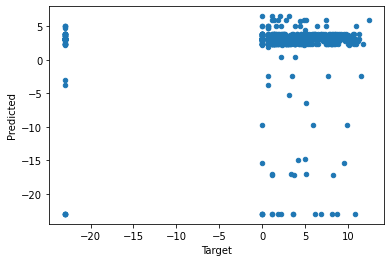

Logarithm
Max leaf nodes: 5000  		 Mean Absolute Error: 5.8754903579413496
          Target  Predicted
17709   3.912023        NaN
7812    6.054439        NaN
10558   4.418841        NaN
14954 -23.025851        NaN
12400   6.989335        NaN
...          ...        ...
16013   4.317488        NaN
2948    1.098612   0.514815
5585    6.470800        NaN
7748    7.000334        NaN
4324    1.386294        NaN

[3301 rows x 2 columns]


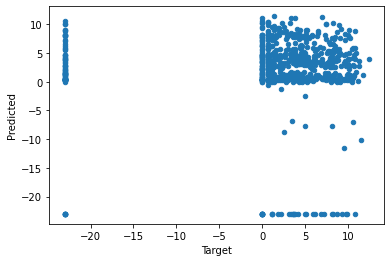

Logarithm
Max leaf nodes: None  		 Mean Absolute Error: 5.903435123857244
          Target     Predicted
17709   3.912023           NaN
7812    6.054439           NaN
10558   4.418841           NaN
14954 -23.025851           NaN
12400   6.989335           NaN
...          ...           ...
16013   4.317488           NaN
2948    1.098612  1.000000e-10
5585    6.470800           NaN
7748    7.000334           NaN
4324    1.386294           NaN

[3301 rows x 2 columns]


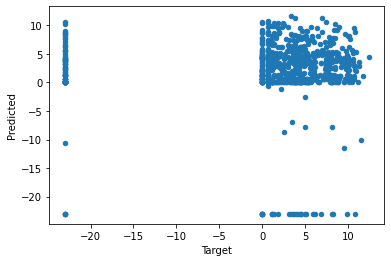

Min-Max
Max leaf nodes: 5  		 Mean Absolute Error: 0.008925609607961075
        Target  Predicted
0     0.000114   0.005354
1     0.000970   0.005354
2     0.000189   0.005354
3     0.000000   0.005354
4     0.002472   0.005354
...        ...        ...
3296  0.000171   0.005354
3297  0.000007   0.005354
3298  0.001472   0.005354
3299  0.002499   0.005354
3300  0.000009   0.005354

[3301 rows x 2 columns]


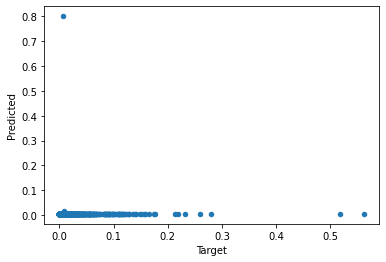

Min-Max
Max leaf nodes: 50  		 Mean Absolute Error: 0.0091160161107026
        Target  Predicted
0     0.000114   0.004346
1     0.000970   0.004346
2     0.000189   0.004346
3     0.000000   0.004346
4     0.002472   0.004346
...        ...        ...
3296  0.000171   0.004346
3297  0.000007   0.004346
3298  0.001472   0.004346
3299  0.002499   0.004346
3300  0.000009   0.004346

[3301 rows x 2 columns]


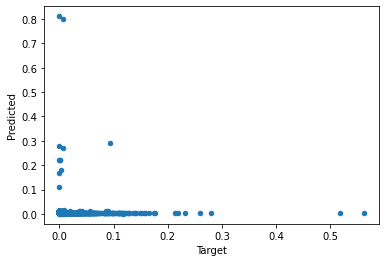

Min-Max
Max leaf nodes: 500  		 Mean Absolute Error: 0.009209191024675868
        Target  Predicted
0     0.000114   0.001954
1     0.000970   0.001954
2     0.000189   0.001954
3     0.000000   0.048661
4     0.002472   0.001954
...        ...        ...
3296  0.000171   0.001954
3297  0.000007   0.001954
3298  0.001472   0.001954
3299  0.002499   0.057792
3300  0.000009   0.001954

[3301 rows x 2 columns]


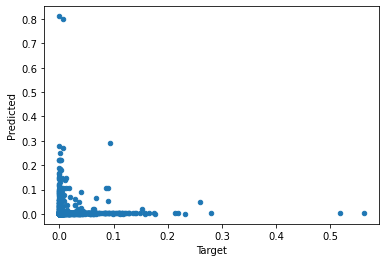

Min-Max
Max leaf nodes: 5000  		 Mean Absolute Error: 0.009197975407031263
        Target  Predicted
0     0.000114   0.000005
1     0.000970   0.000069
2     0.000189   0.000007
3     0.000000   0.048661
4     0.002472   0.000005
...        ...        ...
3296  0.000171   0.000512
3297  0.000007   0.000358
3298  0.001472   0.002624
3299  0.002499   0.049272
3300  0.000009   0.000052

[3301 rows x 2 columns]


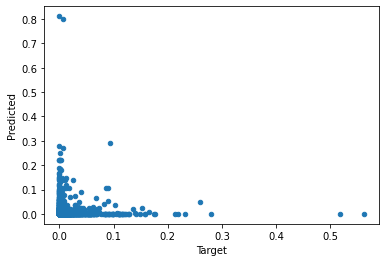

Min-Max
Max leaf nodes: None  		 Mean Absolute Error: 0.009190702854944891
        Target  Predicted
0     0.000114   0.000002
1     0.000970   0.000077
2     0.000189   0.000000
3     0.000000   0.048661
4     0.002472   0.000009
...        ...        ...
3296  0.000171   0.000512
3297  0.000007   0.000358
3298  0.001472   0.004138
3299  0.002499   0.049272
3300  0.000009   0.000052

[3301 rows x 2 columns]


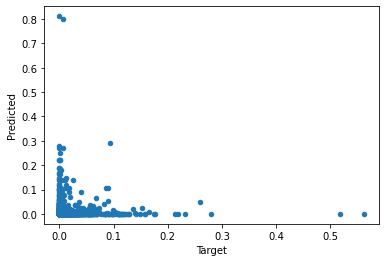

In [278]:
for target in targets:
    
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, targets[target], random_state=1)
    
    # learn the "vocabulary" of the train data
    vectorizer.fit(X_train)
    
    # transform data into a document-term matrix (aka comment-word matrix)
    X_train_dtm = vectorizer.transform(X_train)
    
    # using the fitted vocabulary, transform testing data into document-term matrix
    X_test_dtm = vectorizer.transform(X_test)
    
    print(target)
    
    # compare MAE with differing values of max_leaf_nodes
    for max_leaf_nodes in [5, 50, 500, 5000, None]:
        predicted_likes, my_mae = get_mae(max_leaf_nodes,X_train_dtm, X_test_dtm, y_train, y_test)
        msg = "Max leaf nodes: {}  \t\t Mean Absolute Error: {}".format(max_leaf_nodes, my_mae)
        print(msg)
        df = pd.DataFrame()
        if isinstance(y_test, pd.Series):
            df['Target'] = pd.Series(y_test)
        else:
            df['Target'] = pd.Series(y_test.reshape(y_test.shape[0],))
        df['Predicted'] = pd.Series(predicted_likes.reshape(predicted_likes.shape[0],))
        print(df)
        df.reset_index(inplace=True)
        df.plot(kind='scatter',x='Target',y='Predicted')
        plt.show()
    